In [1]:
# importing libraries

import os
import sys

import numpy as np
import pandas as pd
from scipy import stats  

import matplotlib.pylab as plt
import matplotlib.mlab as mlab
%matplotlib inline
import seaborn as sns
from pylab import rcParams
from IPython.display import Markdown, display

from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler 
from sklearn.metrics import classification_report 

from sklearn.linear_model import LogisticRegression

import itertools    

C:\Users\mm\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# How to detect and mitigate gender biases in credit score models?

### Introduction
##### This interactive tool is designed for financial services providers (FSPs) who aim to detect and mitigate gender biases in their credit score models. This tool can be used to demonstrate unfair decisions against a certain gender due to gender biases in data used for credit scoring and imbalanced  proportion of female and male loan applicants within credit portfolios. 

### Questions addressed by our interactive tool
##### •	Do we have gender biases in the outputs (decisions) of our credit score model?
##### •	If gender biases are present in the outputs, how severe are they?
##### •	And in those situations, how can we mitigate them? 

### What do we mean by bias and fairness in a credit score model? What fairness notions are we going to study?
##### Bias can refer to any form of preference. In this interactive tool, our focus is on unfair gender bias or gender discrimination. Gender-based  algorithmic bias happens when an algorithm’s outputs are systemically prejudiced against a group of people, with gender explaining the bias.
##### Although we have not included gender in our credit score model and our model is gender blind, data that we feed to our algorithm intentionally inherits gender biases that can affect the final decision against one certain gender. 
##### Therefore, we show that discarding gender as a protected attribute from the model does not guarantee fair outcomes. In addition, we provide our users the opportunity of creating a credit portfolio that is not balanced in its proportion of male and female loan  applicants to study how this can lead to unfair decisions. 
##### Fairness in algorithmic fairness does not have a unique definition. There are more than twenty definitions on fairness and mathematically we can prove that it is impossible to satisfy all these definitions simultaneously. Therefore, each FSP needs to choose those fairness definitions that are most important to them and try to work on satisfying them.      
##### In designing this tool, our purpose was to provide a practical example on algorithmic bias without having to cover the long list of fairness  notions. Therefore, we focus on a subset of only three of these fairness notions. These three are predictive parity, predictive equality and equal opportunity. 
##### •	Predictive parity is satisfied if male and female applicants with good credit score have the same chance of good predicted credit score. Predictive parity is the equivalent of positive predicted value (PPV). Therefore, the higher it is, the better this fairness notion is.
##### •	Predictive equality is satisfied if male and female loan applicants with actual bad credit scores should have equal chance of being incorrectly assigned a  good predicted credit score. Predictive equality is the equivalent of false positive error rate (FPR). Therefore, the lower it is, the better this fairness notion is.
##### •	Equal opportunity is satisfied if male and female loan applicants with good credit scores have the same chance of being incorrectly assigned a  bad predicted credit score. Equal opportunity is the equivalent of false negative error rate (FNR). Therefore, the lower it is, the better this fairness notion is. 

### How our credit score model makes a decision?
##### Our credit score is developed based on a logistic regression model. This model takes an initial input from a loan applicant and based on the  input data predicts a credit score that can take any value between 0 and 1. Let’s assume that this model predicts an applicant’s score to be 0.67.  Should the FSP gives loan to this applicant? There is not a straightforward binary answer to this question. The answer depends on the level  of risk that an FSP is willing to tolerate. A bank might be highly risk averse and puts its acceptance threshold on 0.9. Therefore, only applicants whose predicted credit score go above 0.9 would be eligible for a loan and other applicants, such as our applicant with 0.67 score,  are not considered creditworthy. However, other FSPs that are willing to take more risk put the decision threshold at lower levels, for example 0.55. In such cases, the applicant with 0.67 credit score would become eligible. In real world scenarios, the process is more complicated than the scenario explained above. In practice, applicant’s credit score, affects credit decision, interest rate and credit amount. However, for the sake of simplicity, we assume that credit applicants can only experience two scenarios; approval/rejection and all of those who are perceived creditworthy, regardless of their score and risk, would receive the same amount of loan under the same interest rate.

### What is threshold discrimination?
##### So far, we explained what threshold refers to in credit score model and how moving the threshold up or down would affect the risk that an  FSP tolerates. Here, we want to point out to one more fact about thresholds and that fact directly links us to gender fairness. 
##### Moving threshold up or down, can lead to unfair decisions for one specific gender. From an algorithmic fairness standpoint, thresholds that lead to  unfair outcomes are called threshold discrimination. Therefore, where we set the threshold affects both risk and fairness. 
### What is our source of data?
##### Based on the information we collect from a user through our tool chat option, using Python synthetic data, we create a dataset. This dataset  is the basis of our credit portfolio and the main input of our credit score model. Making this tool interactive and giving our users the opportunity to make their own credit portfolio, is one of the main strengths of this work.  Users can create a wide variety of scenarios and assess the effect of each scenario on fairness. What if 80% of credit portfolio are male   applicants? What happens if 95% of applicants are male? What about a case that 50% of applicants are male? What happens if historically more female has gotten rejection? What is the effect of each aforementioned scenario on profit? Do we have gender fairness in each scenario? These are some examples on scenarios that users can explore. 

### Bias injection:
##### In real world scenarios, usually there are some sort of inherent gender biases within datasets. For example, a male or female loan applicant  who was truly creditworthy might be perceived dissolvent due to conscious/unconscious gender prejudices of a loan officer. These types of biases are common and exists in historical datasets and in most cases the biases are against female applicants. To resemble our input data as close as possible to real world scenarios, we injected gender biases against female applicants. We do not go into all the details of how we injected bias into our dataset, but those who are interested can learn and find a detailed information on bias injection using our GitHub page. 

##### Thank you. 
##### Have questions? Lots of people do!
##### Feel free to reach out to Mehrdad Mirpourian by sending an email to mm@womensworldbanking.org



In [18]:
np.random.seed(2)
###########################################################################
def Total_Population_Func():
    while True:
        Total_Population = input('# 1. To start, can you tell us how many customers do you want to have in your simulated credit portfolio? ')
        try:         
            val = int(Total_Population)
            if (val >= 500):
                return val
                break
            elif(val < 0):
                print('')
                print("Error. Use a positive number greater than 500, please try again")  
            elif(val < 500 and val > 0):
                print("Error. You need to have at least 500 applicants, please try again")
                
        except ValueError:
            print("Characters are not accepted, please enter a number")
Total_Population = Total_Population_Func()
###########################################################################
def Male_Perc_Func():
    while True:
        Male_Perc = input('# 2. What percent of your credit portfolio is male customers? Enter a number between 0 and 1, i.e: 0.9 for 90%. ')
        try:         
            val = float(Male_Perc)
            if (val >= 0 and val <= 1):
                return val
                break
            elif(val < 0 or val > 1)   :
                print('')
                print("Error. The value cannot be larger than 1 or smaller than 0. please try again")     
        except ValueError:
            print("Error. Characters are not accepted, please enter a number")
Male_Perc = Male_Perc_Func()

Male_Population = int(Total_Population * Male_Perc)
Female_Population = Total_Population - Male_Population
print('That is great. There are ', Male_Population, ' male and ', Female_Population, ' female applicants in your simulated credit portfolio.')
###########################################################################
print('*************')
print('Before asking the next questions, we need to define some terms for users of this tool.')
print('Let’s split your disbursed loans into bad loans and good loans.')      
print('    A bad loan is a loan that the borrower does not pay back.') 
print('Your loss in this case is the principal plus the interest you might have gotten from another customer.')
print('    A good loan is a loan that the borrower pays back in full. Your profit is the interest.')
print('*************')
print('Now, we can continue asking our questions.')
###########################################################################
def Perc_Approval_M_Func():
    while True:
        Perc_Approval_M = input('# 3. On average, what percent of your male loan applicants are offered credit? Enter a number between 0 and 1. ')
        try:         
            val = float(Perc_Approval_M)
            if (val >= 0 and val <= 1):
                return val
                break
            elif(val < 0 or val > 1)   :
                print('')
                print("Error. The value cannot be larger than 1 or smaller than 0. please try again")     
        except ValueError:
            print('')
            print("Error. Characters are not accepted, please enter a number")
Perc_Approval_M = Perc_Approval_M_Func()
###########################################################################
def Perc_Approval_F_Func():
    while True:
        Perc_Approval_F = input('# 4. On average, what percent of your female loan applicants are offered credit? Enter a number between 0 and 1. ')
        try:         
            val = float(Perc_Approval_F)
            if (val >= 0 and val <= 1):
                return val
                break
            elif(val < 0 or val > 1)   :
                print('')
                print("Error. The value cannot be larger than 1 or smaller than 0. please try again")     
        except ValueError:
            print('')
            print("Error. Characters are not accepted, please enter a number")
Perc_Approval_F = Perc_Approval_F_Func()
###########################################################################
Perc_Rejected_M = 1 - Perc_Approval_M
Perc_Rejected_F = 1 - Perc_Approval_F
###########################################################################
def Profit_Func():
    while True:
        Profit = input('# 5. On average, what is your best guess for how much you earn by giving a good loan? ')
        try:         
            val = float(Profit)
            if (val > 0):
                return val
                break
            elif(val < 0 ):
                print('')
                print("Error. Profit cannot be negative. please try again")     
        except ValueError:
            print('')
            print("Error. Characters are not accepted, please enter a number")
Profit = Profit_Func()
###########################################################################
def Bad_loan_loss_Func():
    while True:
        Bad_loan_loss = input('# 6. On average, what is your best guess for how much you lose by giving a bad loan? ')
        try:         
            val = float(Bad_loan_loss)
            if (val > 0 and val > Profit):
                return val
                break
            elif(val < 0 ):
                print('')
                print("Error. Please try again and insert a positive number.")
            elif(val < Profit):
                print('')
                print("Error. Loss should be larger than profit. Please try again!")
        except ValueError:
            print('')
            print("Error. Characters are not accepted, please enter a number")
Bad_loan_loss = Bad_loan_loss_Func()
print('')

# 1. To start, can you tell us how many customers do you want to have in your simulated credit portfolio? 1500
# 2. What percent of your credit portfolio is male customers? Enter a number between 0 and 1, i.e: 0.9 for 90%. 0.63
That is great. There are  945  male and  555  female applicants in your simulated credit portfolio.
*************
Before asking the next questions, we need to define some terms for users of this tool.
Let’s split your disbursed loans into bad loans and good loans.
    A bad loan is a loan that the borrower does not pay back.
Your loss in this case is the principal plus the interest you might have gotten from another customer.
    A good loan is a loan that the borrower pays back in full. Your profit is the interest.
*************
Now, we can continue asking our questions.
# 3. On average, what percent of your male loan applicants are offered credit? Enter a number between 0 and 1. 0.6
# 4. On average, what percent of your female loan applicants are offered credi

### Your credit portfolio in a glance.

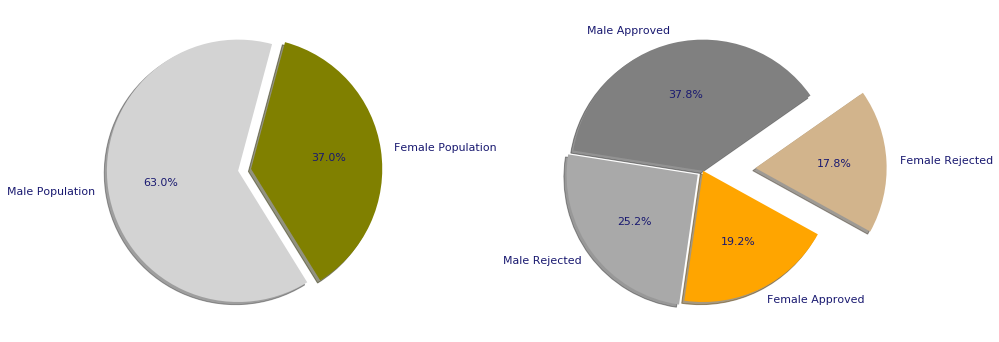

In [19]:
fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (14, 14))

labels_1 = 'Male Population', 'Female Population'
labels_2 = 'Male Approved', 'Male Rejected', 'Female Approved', 'Female Rejected'
sizes_1 = [Male_Population, Female_Population]
sizes_2 = [(Male_Population * Perc_Approval_M), (Male_Population * float(1 - Perc_Approval_M)),
           (Female_Population * Perc_Approval_F), (Female_Population * float(1 - Perc_Approval_F))]
                                                 
explode_1 = (0, 0.1)  # only "explode" the second 
explode_2 = (0, 0.05, 0.0, 0.4)  # only "explode" the second 
colors_1 = ['lightgrey', 'olive']
colors_2 = ['grey', 'darkgrey', 'orange', 'tan']

ax1.pie(sizes_1, explode = explode_1, labels = labels_1, colors = colors_1, autopct = '%1.1f%%', textprops={'fontsize': 11, 'color' : "midnightblue"}, shadow = True, startangle = 75)
ax2.pie(sizes_2, explode = explode_2, labels = labels_2, colors = colors_2, autopct = '%1.1f%%', textprops={'fontsize': 11, 'color' : "midnightblue"}, shadow = True, startangle = 35)
plt.tight_layout()
plt.show()

In [20]:
# We train one model/classifier that includes both men and women records. However, this model/classifier is gender blind.
# gender blind model refers to a model that does not include gender as an explanatory variable in its decision making processes

# Build a dataset for females
Approval_Rate_F = Perc_Approval_F    # this value was given by the user
Rejection_Rate_F = Perc_Rejected_F   # this value was given by the user
Sample_Size_F = Female_Population    # this value was given by the user

# as the first step, using the user inputs, we build a dataset for female customers
X_F, y_F = make_classification(n_classes = 2, weights = [Rejection_Rate_F, Approval_Rate_F], 
           n_features = 14, n_informative = 8, n_samples = Sample_Size_F, random_state = 1)

# As the second step, we are going to inject bias into  female dataset we constructed above.
# First, we need to explain what bias is and how are we going to inject this bias into our dataset.
# The make-classification function used earlier, produces the output variable y that is based on its X counterparts.
# So, for each record, the specific combination of Xs yields to a y to that is either 1 or 0. 
# Given this information, now we can explain how we create the bias. 
    # Bias creation: Those customers that their socio-economic data (Xs) make them to be considered creditworthy receive
    # 1 for their y variable. If we take such a record and without changing any of the Xs change y=1 to y=0,
    # We have literally created a record that contains prejudice. such prejudice is reffered to as bias in our research. 
    # This approach is very similar to the mechanism that a credit model/loan officer, rejects a creditworthy customer.
    # In other words, a customer that has good Xs (creditworthy customer), but instead of receiving a loan (y=1), gets rejected (y=0).

X_F = pd.DataFrame(data = X_F, columns = ["column1", "column2", "column3", "column4", "column5", "column6", "column7",
                                          "column8", "column9", "column10", "column11", "column12", "column13", "column14"])
y_F = pd.DataFrame(data = y_F, columns = ["Grant_Credit"])

df_F = pd.concat([X_F, y_F], axis = 1)

# Creating and injecting bias into female dataset 
df_subset_F = df_F.loc[df_F['Grant_Credit'] == 1]               # selecting all those records that their y is 1; creditworthy
df_subset_F = df_subset_F[0:int(df_subset_F.shape[0] * 0.15)]   # we are injecting %15 bias into our female dataset
df_subset_F['Grant_Credit'] = 0
df = pd.concat([df_subset_F, df_F], axis = 0)
X_F = df.loc[:, df.columns != 'Grant_Credit']
X_F['Gender'] = 0         # 0 stands for females. We do not use gender in our model. However, later on, we need gender when we detect bias on the model output
y_F = pd.DataFrame(data = df, columns = ['Grant_Credit'])
df_F2 = pd.concat([X_F, y_F], axis = 1)
########################################################
########################################################
# Build a dataset for males
Approval_Rate_M = Perc_Approval_M
Rejection_Rate_M = Perc_Rejected_M
Sample_Size_M = Male_Population
X_M, y_M = make_classification(n_classes = 2, weights = [Rejection_Rate_M, Approval_Rate_M], 
                    n_features = 14, n_informative = 8, n_samples = Sample_Size_M, random_state = 1)
X_M = pd.DataFrame(data = X_M, columns = ['column1', 'column2', 'column3', 'column4', 'column5', 'column6', 'column7',
                                         'column8', 'column9', 'column10', 'column11', 'column12', 'column13', 'column14'])
X_M['Gender'] = 1 # 1 stands for males
y_M = pd.DataFrame(data = y_M, columns = ['Grant_Credit'])
df_M2 = pd.concat([X_M, y_M], axis = 1)
########################################################
########################################################
# Concatenating male and femlae datasets and later use them in one model

# As you saw in the above lines of codes, we created separate dataset for female and male customers. Unlike female dataset, 
# male dataset does not contain injected bias.  
df_Tot = pd.concat([df_F2, df_M2], axis = 0)    # concatenate male and female datasets together.
X = df_Tot.iloc[: , 0:15]                       # we do not include gender into our classification model
X = X.to_numpy()
y = df_Tot.iloc[: , -1]
y = y.to_numpy()
########################################################
########################################################
# Building credit score model - Logistic regression
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

X_test_Gender = X_test[:,14]                     # We do not include gender in classification and our model is gender blind. That is why we select up to column 14. column 15 is gender
X_test = X_test[:, 0:14]
X_train = X_train[:, 0:14]

model = LogisticRegression(solver = 'lbfgs')
model.fit(X_train, y_train)
yhat = (model.predict_proba(X_test))[:, 1]       # keep probabilities for positive outcomes only

# in the above lines of code, we built the model. The following lines are preparation work for assessing fairness.
y_test_DF = pd.DataFrame(data = y_test, columns = ['y_test'])
y_hat_DF = pd.DataFrame(data = yhat, columns = ['y_hat'])
gender_df = pd.DataFrame(data = X_test_Gender, columns = ['Gender'])    
df_Part_I = pd.concat([y_test_DF, y_hat_DF, gender_df], axis = 1) 
########################################################
storage = []
for i in range(1, 100):                          # We assess the prediction at different thresholds. these thresholds start with 0 and increase by 0.01 untill we reach to 0.99.
    a = list(itertools.repeat(i/100, len(yhat)))
    storage.append(a)
df_Part_II = pd.DataFrame(storage).T

column_names = []
for i in range(1,100):
    temp_col_name = ('Threshold_' + str(i/100))
    column_names.append(temp_col_name)
df_Part_II.columns = column_names

df_merged_Part_I_II = pd.concat([df_Part_I, df_Part_II], axis = 1)

for i in range(1, 100):
    comparison_column = np.where(df_merged_Part_I_II["y_hat"] > df_merged_Part_I_II["Threshold_" + str(i/100)], 1, 0)
    df_merged_Part_I_II["Prediction_at_Threshold_" + str(i/100)] = comparison_column
########################################################
# The FSP, needs to choose a threshold and based on that threshold decide to accept or reject someone's credit application.
# what should be this decision threshold? in this tool, the basis of decision making is the threshold that
# gives the max profit of the portfolio. Therefore, we calculate the profit under each threshold and at the end choose
# the threshold that gives the maximum profit.

Expected_Profit = [] 
Threshold = []

for i in range(1, 100):   
    TP_Temp = (confusion_matrix(df_merged_Part_I_II['y_test'], df_merged_Part_I_II['Prediction_at_Threshold_' + str(i/100)])[1,1])   # true positives
    FP_Temp = (confusion_matrix(df_merged_Part_I_II['y_test'], df_merged_Part_I_II['Prediction_at_Threshold_' + str(i/100)])[0,1])   # false positives
    Expected_Profit.append((Profit * TP_Temp) - (Bad_loan_loss * FP_Temp))   
    Threshold.append(i)
    
Profit_Threshold_df = pd.concat([pd.Series(Expected_Profit), pd.Series(Threshold)], axis = 1)
Profit_Threshold_df.columns = ['Expected_Profit', 'Threshold']

Maximum_Profit = (Profit_Threshold_df.loc[Profit_Threshold_df['Expected_Profit'] == Profit_Threshold_df.Expected_Profit.max()]).head(1)
Optimum_Threshold_for_Profit = float(np.array(Maximum_Profit.Threshold) / 100)   #this is the threshold that gives the yields to maximum portfolio profit 
df_merged_Part_I_II = df_merged_Part_I_II[['y_test', 'Gender', 'y_hat']]
##############################################################################################################
# Now that we know the threshold that gives us the max profit, we can study how fair we are at that threshold towards female and male customers?

# Fairness towards female customers
df_at_Opt_Thereshold_F = df_merged_Part_I_II.loc[(df_merged_Part_I_II['Gender'] == 0)]
df_at_Opt_Thereshold_F['yhat_temp'] = np.where(df_at_Opt_Thereshold_F['y_hat'] > Optimum_Threshold_for_Profit, 1, 0)
# TP stands for true positive, FP stands for false positve, FN stands for false negative and TN stands for true negative
df_at_Opt_Thereshold_F['TP_F'] = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], df_at_Opt_Thereshold_F['yhat_temp'])[1,1])
df_at_Opt_Thereshold_F['FP_F'] = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], df_at_Opt_Thereshold_F['yhat_temp'])[0,1])
df_at_Opt_Thereshold_F['FN_F'] = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], df_at_Opt_Thereshold_F['yhat_temp'])[1,0])
df_at_Opt_Thereshold_F['TN_F'] = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], df_at_Opt_Thereshold_F['yhat_temp'])[0,0])
# PPV stands for positive predicted valuem FPR stands for false positve rate and FNR stands for false negative rate.
df_at_Opt_Thereshold_F['PPV_F'] = df_at_Opt_Thereshold_F['TP_F'] / (df_at_Opt_Thereshold_F['TP_F'] + df_at_Opt_Thereshold_F['FP_F'])
df_at_Opt_Thereshold_F['FPR_F'] = df_at_Opt_Thereshold_F['FP_F'] / (df_at_Opt_Thereshold_F['FP_F'] + df_at_Opt_Thereshold_F['TN_F'])
df_at_Opt_Thereshold_F['FNR_F'] = df_at_Opt_Thereshold_F['FN_F'] / (df_at_Opt_Thereshold_F['FN_F'] + df_at_Opt_Thereshold_F['TP_F'])

df_at_Opt_Thereshold_F['Predictive_Parity_Ratio_F'] = (df_at_Opt_Thereshold_F['TP_F'] / (df_at_Opt_Thereshold_F['FP_F'] + df_at_Opt_Thereshold_F['TP_F'] + 0.0000001))     # we add a very small number to the denominator to avoid '0 divided by 0' cases.
df_at_Opt_Thereshold_F['Predictive_Equality_Ratio_F'] = (df_at_Opt_Thereshold_F['FP_F'] / (df_at_Opt_Thereshold_F['TN_F'] + df_at_Opt_Thereshold_F['FP_F'] + 0.0000001))
df_at_Opt_Thereshold_F['Equal_Opportunity_Ratio_F'] = (df_at_Opt_Thereshold_F['FN_F'] / (df_at_Opt_Thereshold_F['TP_F'] + df_at_Opt_Thereshold_F['FN_F'] + 0.0000001))
df_at_Opt_Thereshold_F = df_at_Opt_Thereshold_F.head(1)

# Fairness towards male customers
df_at_Opt_Thereshold_M = df_merged_Part_I_II.loc[(df_merged_Part_I_II['Gender'] == 1)]
df_at_Opt_Thereshold_M['yhat_temp'] = np.where(df_at_Opt_Thereshold_M['y_hat'] > Optimum_Threshold_for_Profit, 1, 0)

df_at_Opt_Thereshold_M['TP_M'] = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], df_at_Opt_Thereshold_M['yhat_temp'])[1,1])
df_at_Opt_Thereshold_M['FP_M'] = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], df_at_Opt_Thereshold_M['yhat_temp'])[0,1])
df_at_Opt_Thereshold_M['FN_M'] = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], df_at_Opt_Thereshold_M['yhat_temp'])[1,0])
df_at_Opt_Thereshold_M['TN_M'] = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], df_at_Opt_Thereshold_M['yhat_temp'])[0,0])

df_at_Opt_Thereshold_M['PPV_M'] = df_at_Opt_Thereshold_M['TP_M'] / (df_at_Opt_Thereshold_M['TP_M'] + df_at_Opt_Thereshold_M['FP_M'])
df_at_Opt_Thereshold_M['FPR_M'] = df_at_Opt_Thereshold_M['FP_M'] / (df_at_Opt_Thereshold_M['FP_M'] + df_at_Opt_Thereshold_M['TN_M'])
df_at_Opt_Thereshold_M['FNR_M'] = df_at_Opt_Thereshold_M['FN_M'] / (df_at_Opt_Thereshold_M['FN_M'] + df_at_Opt_Thereshold_M['TP_M'])

df_at_Opt_Thereshold_M['Predictive_Parity_Ratio_M'] = (df_at_Opt_Thereshold_M['TP_M'] / (df_at_Opt_Thereshold_M['FP_M'] + df_at_Opt_Thereshold_M['TP_M'] + 0.0000001))
df_at_Opt_Thereshold_M['Predictive_Equality_Ratio_M'] = (df_at_Opt_Thereshold_M['FP_M'] / (df_at_Opt_Thereshold_M['TN_M'] + df_at_Opt_Thereshold_M['FP_M'] + 0.0000001))
df_at_Opt_Thereshold_M['Equal_Opportunity_Ratio_M'] = (df_at_Opt_Thereshold_M['FN_M'] / (df_at_Opt_Thereshold_M['TP_M'] + df_at_Opt_Thereshold_M['FN_M'] + 0.0000001))
df_at_Opt_Thereshold_M = df_at_Opt_Thereshold_M.head(1)


C:\Users\mm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:125: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:127: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\mm\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:128: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [21]:
display(Markdown('## ARE WE FAIR?'))
display(Markdown('### A. Are we violating predictive parity fairness?'))
display(Markdown('#### In other words, are we fair in providing loan towards both genders creditworthy applicants?'))

if abs(float(df_at_Opt_Thereshold_M['PPV_M']) - float(df_at_Opt_Thereshold_F['PPV_F'])) > 0.01:   # 0.01 (1%) difference is acceptable and considers fair. If the difference goes above 0.01, fairness is violated. 
    print('Our credit score model did not treat both genders equally.')
    print('')
    print('Creditworthy male loan applicants have', round(float(np.array(df_at_Opt_Thereshold_M['PPV_M'] * 100)), 1), 'chance of receiving loan,')
    print('while creditworthy female loan applicants have', round(float(np.array(df_at_Opt_Thereshold_F['PPV_F'] * 100)), 1), 'chance of receiving loan')
   
else:
    print('The credit score model is not gender biased in giving loan to creditworthy customers')    

display(Markdown('### B. Are we violating predictive equality fairness?'))
display(Markdown('#### In other words, do we detect females insolvents as good as we detect male insolvents?'))

if abs(float(df_at_Opt_Thereshold_M['FPR_M']) - float(df_at_Opt_Thereshold_F['FPR_F'])) > 0.01: # 0.01 (1%) difference is acceptable and considers fair. If the difference goes above 0.01, fairness is violated.
    print('Our credit score model did not treat both genders equally.')
    print('')
    print('It detects', round(float(np.array(df_at_Opt_Thereshold_M['FPR_M'] * 100)),1), 'of males insolvents,')   
    print('while it can detect', round(float(np.array(df_at_Opt_Thereshold_F['FPR_F'] * 100)),1), 'of female insolvents.')
else:
    print('The credit score model acts fairly in detecting insolvent applicants.')    

display(Markdown('### C. Are we violating equal opportunity fairness?'))
display(Markdown('#### In other words, are we making more mistakes towards creditworthy applicants of one specific gender?'))

if abs(round(float(np.array(df_at_Opt_Thereshold_M['FNR_M'] * 100)),1) - round(float(np.array(df_at_Opt_Thereshold_F['FNR_F'] * 100)),1)) > 0.01:   # 0.01 (1%) difference is acceptable and considers fair. If the difference goes above 0.01, fairness is violated.
    print('Our credit score model did not treat both genders equally.')
    print('')
    print('Mistakenly, it detects', round(float(np.array(df_at_Opt_Thereshold_M['FNR_M'] * 100)),1), 'of true creditworthy male applicants as insolvents,')
    print('while it makes', round(float(np.array(df_at_Opt_Thereshold_F['FNR_F'] * 100)),1), 'percent mistakes towards true creditworthy female applicants and consider them as insolvents.')
else:
    print('The credit score model is gender neutral in making mistakes against creditworthy applicants.')    

## ARE WE FAIR?

### A. Are we violating predictive parity fairness?

#### In other words, are we fair in providing loan towards both genders creditworthy applicants?

Our credit score model did not treat both genders equally.

Creditworthy male loan applicants have 88.7 chance of receiving loan,
while creditworthy female loan applicants have 79.5 chance of receiving loan


### B. Are we violating predictive equality fairness?

#### In other words, do we detect females insolvents as good as we detect male insolvents?

Our credit score model did not treat both genders equally.

It detects 17.3 of males insolvents,
while it can detect 16.3 of female insolvents.


### C. Are we violating equal opportunity fairness?

#### In other words, are we making more mistakes towards creditworthy applicants of one specific gender?

Our credit score model did not treat both genders equally.

Mistakenly, it detects 17.7 of true creditworthy male applicants as insolvents,
while it makes 49.2 percent mistakes towards true creditworthy female applicants and consider them as insolvents.


### By setting the threshold to:

58

### We can achieve the maximum profit of this credit portfolio which is expected to be:

40600.0

<Figure size 648x648 with 0 Axes>

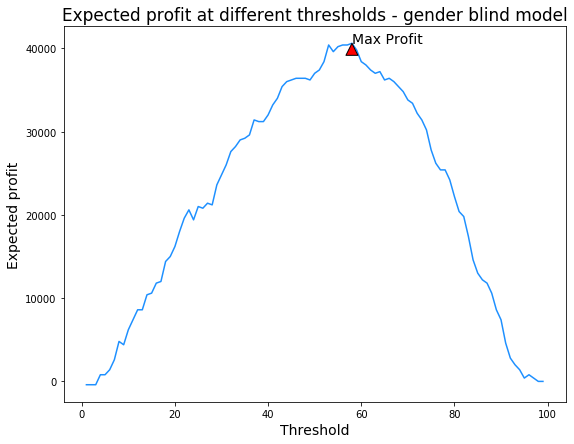

In [22]:
plot1 = plt.figure(1)
plt.rcParams["figure.figsize"] = [9, 9]
fig = plt.figure()
ax = fig.add_subplot(211)

x = Profit_Threshold_df['Threshold'].tolist()
y = Profit_Threshold_df['Expected_Profit'].tolist()
line, = ax.plot(x, y, color = 'dodgerblue')
ymax = max(y)
xpos = y.index(ymax)
xmax = x[xpos]
plt.title('Expected profit at different thresholds - gender blind model', color = 'black', fontsize = 17)
plt.xlabel('Threshold', color = 'black', fontsize = 14)
plt.ylabel('Expected profit', fontsize = 14)

ax.annotate('Max Profit', xy = (xmax, ymax), fontsize = 14, xytext = (xmax, ymax), arrowprops = dict(facecolor = 'red', shrink = 2.55),)

fig.subplots_adjust(top=1.4)

print('')
display(Markdown('### By setting the threshold to:'), xmax)
display(Markdown('### We can achieve the maximum profit of this credit portfolio which is expected to be:'), ymax)


In [ ]:
# Now, we know weather our classifier has satisfied predictive parity, predictive equality and equal opportunity.
# Although detecting bias and unfair decisions is crucial for credit risk practitioners, it is not enough. 
# The natural response to an unfair decision is to work and make that decision fair. 
# Therefore, in this following section, we show how we can mitigate these unfair decisions. 
# There are a wide variety of methods that one can address this problem. 
# Using upsampling/downsamoling (SMOTE), using weighting algorithms, threshold tuning etc all are among the appraches we can use to make our decisions fair. 
# Since, this toolkit and code is designed for credit risk practitioners rather than Pure data scientist, 
# we use threshold tuning, because it is more intuitive compare to the other bias mitigation approaches. 
# *** Reminder: A threshold that leads to unfair decisions is also called discriminator threshold.

In [23]:
# This step is similar to what we developed earlier in the previous section.
# However, for clarity we repeat most of those steps. 
# What we are doing and from a high level standpoint:
# Basically, using the model we had built, we calculate PPV, FNR and FPR for male and female customers separately at each thresohld.
# Knowing PPV, FNR and FPR at each threshold for male and female customers and plotting them, we can detect (if any!) those 
# threshold/s that both male and female have equal PPV, FNR or FPR.

df_at_Opt_Thereshold_M = df_merged_Part_I_II.loc[(df_merged_Part_I_II['Gender'] == 1)]

yhat_tmp_lst = []
TP_M_Lst = []
FP_M_Lst = []
FN_M_Lst = []
TN_M_Lst = []
Predictive_Parity_M = []
Predictive_Equality_M = []
Equal_Opportunity_M = []
Threshold_Lst = []

for i in range(1,100):
    Threshold_Lst.append(i)
    yhat_temp = np.where(df_at_Opt_Thereshold_M['y_hat'] > (i/100), 1, 0)
    yhat_tmp_lst.append(yhat_temp)
    TP_M = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], yhat_temp)[1,1])
    TP_M_Lst.append(TP_M)
    FP_M = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], yhat_temp)[0,1])
    FP_M_Lst.append(FP_M)
    FN_M = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], yhat_temp)[1,0])
    FN_M_Lst.append(FN_M)
    TN_M = (confusion_matrix(df_at_Opt_Thereshold_M['y_test'], yhat_temp)[0,0])
    TN_M_Lst.append(TN_M)
    
    PPV_M = TP_M / (TP_M + FP_M + 0.0000001)   # Denominator cannot be 0, therefore we add a very small number, 0.0000001, to avoid any potential problem
    Predictive_Parity_M.append(PPV_M)
    
    FPR_M = FP_M / (FP_M + TN_M + 0.0000001)
    Predictive_Equality_M.append(FPR_M)
    
    FNR_M = FN_M / (FN_M + TP_M + 0.0000001)
    Equal_Opportunity_M.append(FNR_M)
     
Mitigation_df_M = pd.concat([pd.Series(TP_M_Lst), pd.Series(FP_M_Lst), pd.Series(FN_M_Lst), pd.Series(TN_M_Lst), 
        pd.Series(Predictive_Parity_M), pd.Series(Predictive_Equality_M), pd.Series(Equal_Opportunity_M),
        pd.Series(Threshold_Lst)], axis = 1)
Mitigation_df_M.columns = ['TP_M_Lst', 'FP_M_Lst', 'FN_M_Lst', 'TN_M_Lst', 'Predictive_Parity_M', 'Predictive_Equality_M', 
                           'Equal_Opportunity_M', 'Threshold']

#################################################################################################################
df_at_Opt_Thereshold_F = df_merged_Part_I_II.loc[(df_merged_Part_I_II['Gender'] == 0)]

TP_F_Lst = []
FP_F_Lst = []
FN_F_Lst = []
TN_F_Lst = []
Predictive_Parity_F = []
Predictive_Equality_F = []
Equal_Opportunity_F = []

for i in range(1,100):
    yhat_temp_F = np.where(df_at_Opt_Thereshold_F['y_hat'] > (i/100), 1, 0)
    TP_F = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], yhat_temp_F)[1,1])
    TP_F_Lst.append(TP_F)
    FP_F = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], yhat_temp_F)[0,1])
    FP_F_Lst.append(FP_F)
    FN_F = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], yhat_temp_F)[1,0])
    FN_F_Lst.append(FN_F)
    TN_F = (confusion_matrix(df_at_Opt_Thereshold_F['y_test'], yhat_temp_F)[0,0])
    TN_F_Lst.append(TN_F)
    
    PPV_F = TP_F / (TP_F + FP_F + 0.0000001)
    Predictive_Parity_F.append(PPV_F)
    
    FPR_F = FP_F / (FP_F + TN_F + 0.0000001)
    Predictive_Equality_F.append(FPR_F)
    
    FNR_F = FN_F / (FN_F + TP_F + 0.0000001)
    Equal_Opportunity_F.append(FNR_F)
     
Mitigation_df_F = pd.concat([pd.Series(TP_F_Lst), pd.Series(FP_F_Lst), pd.Series(FN_F_Lst), pd.Series(TN_F_Lst), 
        pd.Series(Predictive_Parity_F), pd.Series(Predictive_Equality_F), pd.Series(Equal_Opportunity_F)], axis = 1)
Mitigation_df_F.columns = ['TP_F_Lst', 'FP_F_Lst', 'FN_F_Lst', 'TN_F_Lst', 'Predictive_Parity_F', 'Predictive_Equality_F', 
                           'Equal_Opportunity_F']

Mitigation_df = pd.concat([Mitigation_df_M, Mitigation_df_F], axis = 1)

In [25]:
# When the difference of predictive parity/predictive equality/equal opportunity among male and female applicants is less than
# 1%, we claim that specific fairness is satisfied. 

Mitigation_df['Predictive_Parity_Diff'] = abs(Mitigation_df['Predictive_Parity_M'] - Mitigation_df['Predictive_Parity_F'])
Predictive_Parity_Overlap1_a = Mitigation_df.loc[Mitigation_df['Predictive_Parity_Diff'] <= 0.01]

Predictive_Parity_Overlap1_a_TH = pd.Series(Predictive_Parity_Overlap1_a['Threshold'])

PP_O_1 = []

for i in Predictive_Parity_Overlap1_a_TH:
    PP_O_1.append(i)  # we select those thresholds that satisfy the predictive parity

##############################
Mitigation_df['Predictive_Parity_Diff_NF'] = Mitigation_df['Predictive_Parity_M'] - Mitigation_df['Predictive_Parity_F']

sign = Mitigation_df.Predictive_Parity_Diff_NF.map(np.sign)
diff1 = sign.diff(periods = 1).fillna(0)
diff2 = sign.diff(periods = -1).fillna(0)

df1 = Mitigation_df.loc[diff1[diff1 != 0].index]
df2 = Mitigation_df.loc[diff2[diff2 != 0].index]
idx = np.where(abs(df1.Predictive_Parity_Diff_NF.values) < abs(df2.Predictive_Parity_Diff_NF.values), df1.index.values, df2.index.values)
Intersection_of_two_lines = Mitigation_df.loc[idx]

Predictive_Parity_intersect = pd.Series(Intersection_of_two_lines['Threshold'])

PP_O_2 = []

for i in Predictive_Parity_intersect:
    PP_O_2.append(i)  # we select those thresholds that satisfy the predictive parity

PP_O = PP_O_1 + PP_O_2
#####################################################################################
#####################################################################################
Mitigation_df['Predictive_Equality_Diff'] = abs(Mitigation_df['Predictive_Equality_M'] - Mitigation_df['Predictive_Equality_F'])
Predictive_Equality_Overlap_a = Mitigation_df.loc[Mitigation_df['Predictive_Equality_Diff'] <= 0.01]
Predictive_Equality_Overlap_a_TH = pd.Series(Predictive_Equality_Overlap_a['Threshold'])

PE_O_1 = []
for i in Predictive_Equality_Overlap_a_TH:
    PE_O_1.append(i)  # we select those thresholds that satisfy the predictive equality

##############################

Mitigation_df['Predictive_Equality_Diff_NF'] = Mitigation_df['Predictive_Equality_M'] - Mitigation_df['Predictive_Equality_F']

sign = Mitigation_df.Predictive_Equality_Diff_NF.map(np.sign)
diff1 = sign.diff(periods = 1).fillna(0)
diff2 = sign.diff(periods = -1).fillna(0)

df1 = Mitigation_df.loc[diff1[diff1 != 0].index]
df2 = Mitigation_df.loc[diff2[diff2 != 0].index]
idx = np.where(abs(df1.Predictive_Parity_Diff_NF.values) < abs(df2.Predictive_Parity_Diff_NF.values), df1.index.values, df2.index.values)
Intersection_of_two_lines = Mitigation_df.loc[idx]

Predictive_Equality_intersect = pd.Series(Intersection_of_two_lines['Threshold'])

PE_O_2 = []

for i in Predictive_Equality_intersect:
    PE_O_2.append(i)  # we select those thresholds that satisfy the predictive parity

PE_O = PE_O_1 + PE_O_2
#####################################################################################
#####################################################################################
Mitigation_df['Equal_Opportunity_Diff'] = abs(Mitigation_df['Equal_Opportunity_M'] - Mitigation_df['Equal_Opportunity_F'])
Equal_Opportunity_Overlap_a = Mitigation_df.loc[Mitigation_df['Equal_Opportunity_Diff'] <= 0.01]
Equal_Opportunity_Overlap_a_TH = pd.Series(Equal_Opportunity_Overlap_a['Threshold'])
EO_O_1 = []
for i in Equal_Opportunity_Overlap_a_TH:
    EO_O_1.append(i)   # we select those thresholds that satisfy equal opportunity

###################################################

Mitigation_df['Equal_Opportunity_Diff_NF'] = Mitigation_df['Equal_Opportunity_M'] - Mitigation_df['Equal_Opportunity_F']

sign = Mitigation_df.Equal_Opportunity_Diff_NF.map(np.sign)
diff1 = sign.diff(periods = 1).fillna(0)
diff2 = sign.diff(periods = -1).fillna(0)

df1 = Mitigation_df.loc[diff1[diff1 != 0].index]
df2 = Mitigation_df.loc[diff2[diff2 != 0].index]
idx = np.where(abs(df1.Equal_Opportunity_Diff_NF.values) < abs(df2.Equal_Opportunity_Diff_NF.values), df1.index.values, df2.index.values)
Intersection_of_two_lines = Mitigation_df.loc[idx]

Equal_Opportunity_Intersect = pd.Series(Intersection_of_two_lines['Threshold'])

EO_O_2 = []

for i in Equal_Opportunity_Intersect:
    PE_O_2.append(i)  # we select those thresholds that satisfy the predictive parity

EO_O = EO_O_1 + EO_O_2


###  The following plots visualize  how fair we are at each decision threshold.

##### * The smaller the gap between male and female line plots, the fairer our credit model is.

##### * Purple lines on each plot are associated with thresholds.

##### * If a plot does not have any purple line, it means that there is no possible fairness threshold.

### Reminder:

##### Predictive parity, predictive equality and equal opportunity are values between 0 and 1.

##### Predictive parity is equal to positive predicted value (PPV). The higher the number, the more fair the decision.

##### Predictive equality is equal to false positive error rate (FPR). The lower the number, the more fair the decision.

##### Equal opportunity is equal to false negative error rate (FNR). The lower the number, the more fair the decision.




########################################################################


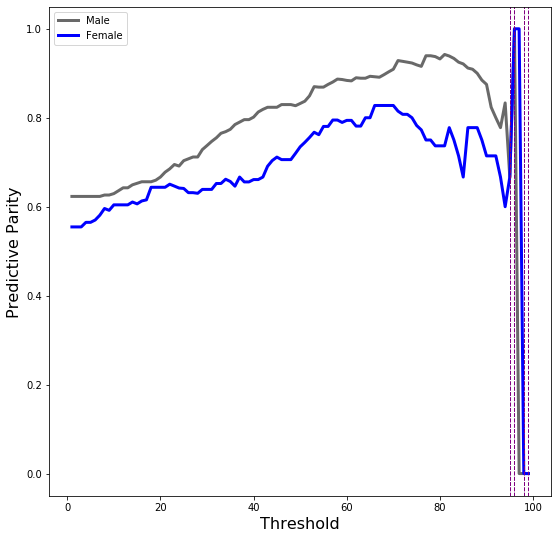

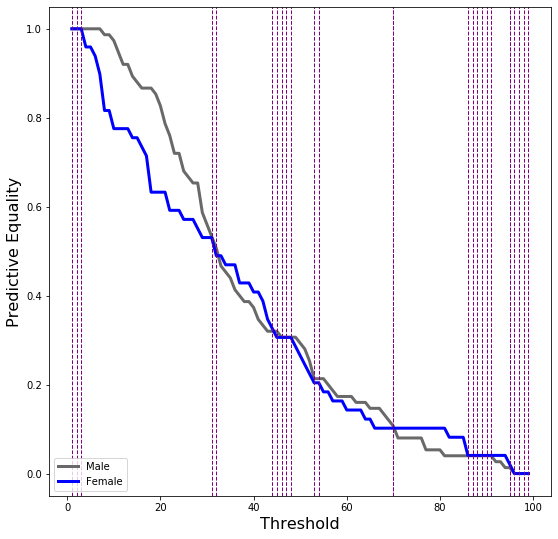

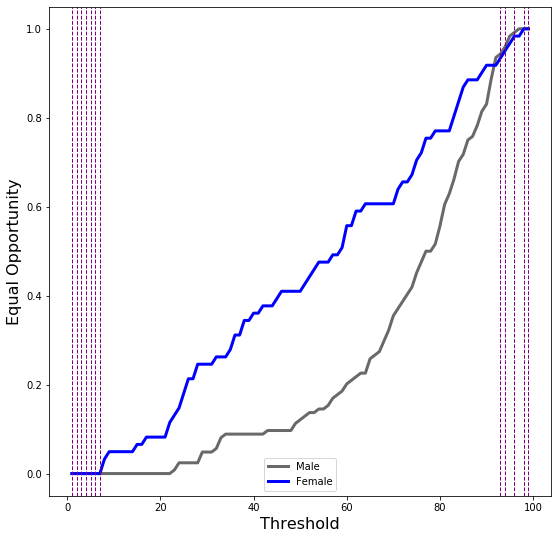

In [26]:
display(Markdown('###  The following plots visualize  how fair we are at each decision threshold.'))
print('')
display(Markdown('##### * The smaller the gap between male and female line plots, the fairer our credit model is.'))
print('')
display(Markdown('##### * Purple lines on each plot are associated with thresholds.'))
print('')
display(Markdown('##### * If a plot does not have any purple line, it means that there is no possible fairness threshold.'))
print('')
display(Markdown('### Reminder:'))
display(Markdown('##### Predictive parity, predictive equality and equal opportunity are values between 0 and 1.'))
display(Markdown('##### Predictive parity is equal to positive predicted value (PPV). The higher the number, the more fair the decision.'))
display(Markdown('##### Predictive equality is equal to false positive error rate (FPR). The lower the number, the more fair the decision.'))
display(Markdown('##### Equal opportunity is equal to false negative error rate (FNR). The lower the number, the more fair the decision.'))

print('')
print('')
print('')
print('########################################################################')
plt.rcParams["figure.figsize"] = [9, 9]

plt.subplots(1)
sns.lineplot(data = Mitigation_df, x="Threshold", y="Predictive_Parity_M", label = 'Male', color = 'dimgrey', markers=True, lw = 3)
sns.lineplot(data=Mitigation_df, x="Threshold", y="Predictive_Parity_F", label = 'Female', color = 'blue', markers=True, lw = 3)
plt.xlabel("Threshold", size = 16)
plt.ylabel("Predictive Parity", size = 16)

for i in PP_O:
    plt.axvline(i, color = 'purple', linewidth= 1, ls='--')
    
############################################################
plt.subplots(1)
plt.rcParams["figure.figsize"] = [9, 9]

sns.lineplot(data = Mitigation_df, x="Threshold", y="Predictive_Equality_M", label = 'Male', color = 'dimgrey', markers=True, lw = 3)
sns.lineplot(data=Mitigation_df, x="Threshold", y="Predictive_Equality_F", label = 'Female', color = 'blue', markers=True, lw = 3)
plt.xlabel("Threshold", size = 16)
plt.ylabel("Predictive Equality", size = 16)

for i in PE_O:
    plt.axvline(i, color = 'purple', linewidth= 1, ls='--')
############################################################
plt.subplots(1)
    
plt.rcParams["figure.figsize"] = [9, 9]

sns.lineplot(data = Mitigation_df, x = "Threshold", y = "Equal_Opportunity_M", label = 'Male', color = 'dimgrey', markers=True, lw = 3)
sns.lineplot(data = Mitigation_df, x = "Threshold", y = "Equal_Opportunity_F", label = 'Female', color = 'blue', markers=True, lw = 3)
plt.xlabel("Threshold", size = 16)
plt.ylabel("Equal Opportunity", size = 16)

for i in EO_O:
    plt.axvline(i, color = 'purple', linewidth= 1, ls='--')
    

## References:
#### * Hardt, M., Price, E., & Srebro, N. (2016). Equality of opportunity in supervised learning. arXiv preprint arXiv:1610.02413.
#### * Verma, S., & Rubin, J. (2018, May). Fairness definitions explained. In 2018 ieee/acm international workshop on software fairness (pp. 1-7). IEEE.
##### * Martin Wattenberg, Fernanda Viégas, and Moritz Hardt. Attacking discrimination with smarter machine learning. Retrieved from:
http://research.google.com/bigpicture/attacking-discrimination-in-ml/

##### * Women's World Banking Github page

    

# The end
